###  Cargar Librerias

In [1]:
#!conda install --yes missingno

In [28]:
import pandas as pd
import missingno as msno
import numpy as np


### Esquema de datos y archivos

Contamos con datos de diferentes fuentes, cada archivo describe un tema especifico relacionado con las ventas electrónico
 


![Img](https://i.imgur.com/HRhd2Y0.png)

In [3]:
folder_commerce  = 'C:\\Users\\felip\\OneDrive\\Escritorio\\Prueba Machine Learning\\Dataset\\E_Commerce_Public_Dataset_by_Olist'
folder_marketing = 'C:\\Users\\felip\\OneDrive\\Escritorio\\Prueba Machine Learning\\Dataset\\Marketing Funnel by Olist'
folder_dataset   = 'C:\\Users\\felip\\OneDrive\\Escritorio\\Prueba Machine Learning\\Dataset'

## Descripcion de la estructura de los datos y missing data
En primer lugar establecemos si hay missing data que puedan. Posteriormente se crearan un conjuntos de datos un únicos con la información relevantes teniendo en cuenta toda la información que nos proporcionar los datos.

In [4]:
list_folder_commerce  = os.listdir(folder_commerce)
list_folder_marketing = os.listdir(folder_marketing)

print("List of commerce\n ")

for jj,ii in zip(range(len(list_folder_commerce)),list_folder_commerce):
    print(jj ,'-',ii)

print("\n\nList Marketing\n")   
for jj,ii in zip(range(len(list_folder_marketing)),list_folder_marketing):
    print(jj ,'-',ii)
    

List of commerce
 
0 - olist_closed_deals_dataset.csv
1 - olist_customers_dataset.csv
2 - olist_geolocation_dataset.csv
3 - olist_marketing_qualified_leads_dataset.csv
4 - olist_orders_dataset.csv
5 - olist_order_items_dataset.csv
6 - olist_order_payments_dataset.csv
7 - olist_order_reviews_dataset.csv
8 - olist_products_dataset.csv
9 - olist_sellers_dataset.csv
10 - product_category_name_translation.csv


List Marketing

0 - olist_closed_deals_dataset.csv
1 - olist_marketing_qualified_leads_dataset.csv


#### Lista de archivos

In [5]:
# Contiene la informacion de la ubicacion geografica de los clientes
df_customers      = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[1]))
# Contiene la informacion de las cooordenadas geograficas  de la compras
df_geolocation    = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[2]))
# Contiene la informacion de todas la compras realizadas por los clientes
df_orders         = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[4]))
#Contiene informacion del producto y vendedor
df_order_items    = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[5]))
#Contiene informacion de pago de todas las ordenes
df_order_payments = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[6]))
#Contiene informacion de las reseñas que las ordenes echas
df_order_reviews  = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[7]))
# Contiene la informacion de la lista de productos ofrecidos en OList
df_products       = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[8]))
# Contiene la informacion de los venderores
df_sellers        = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[9]))

# Nombres en ingles
df_product_translation = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[10]))


Generamos una representación grafica de los valores faltantes

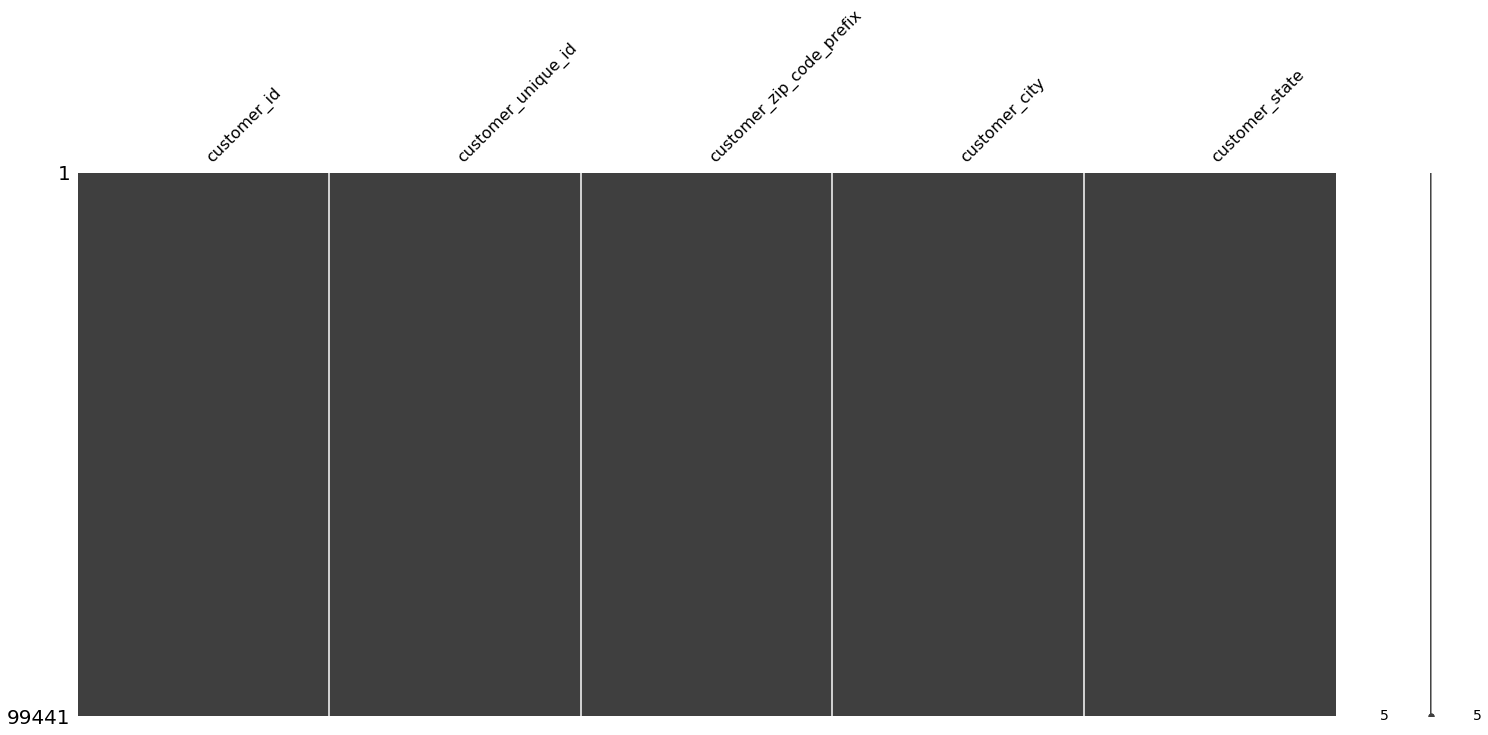

In [6]:
msno.matrix(df_customers) 

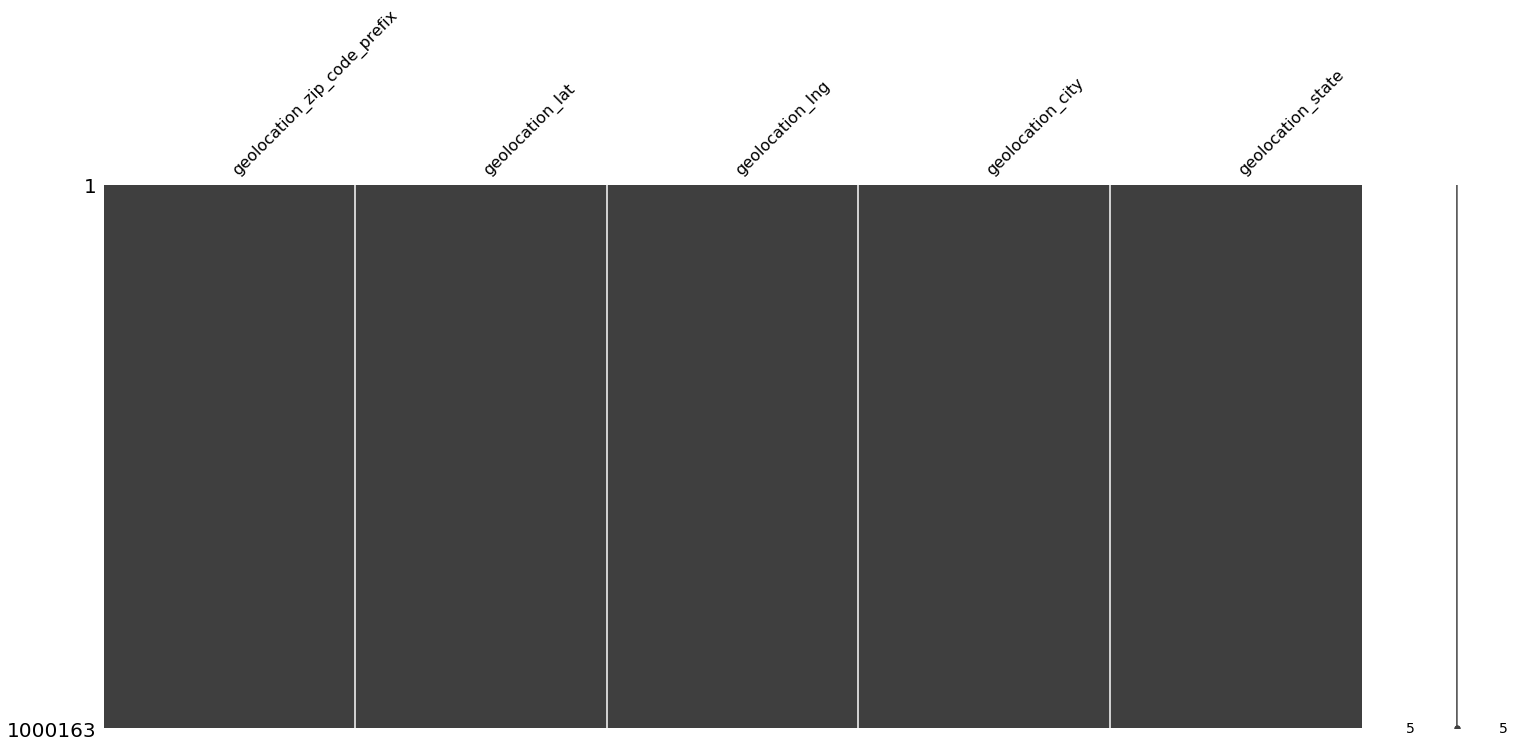

In [7]:
msno.matrix(df_geolocation) 
#df_geolocation.head(10)

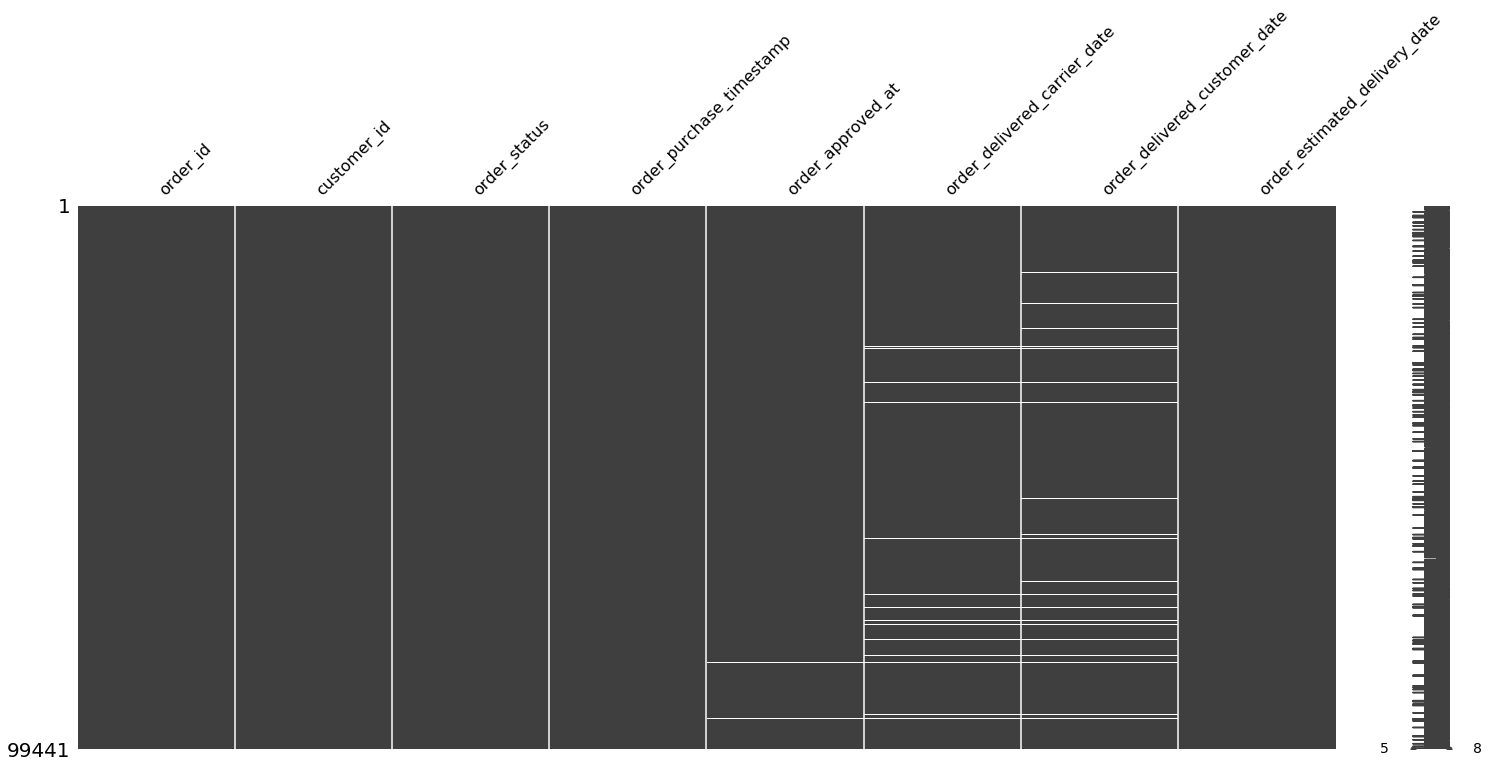

In [8]:
msno.matrix(df_orders) 

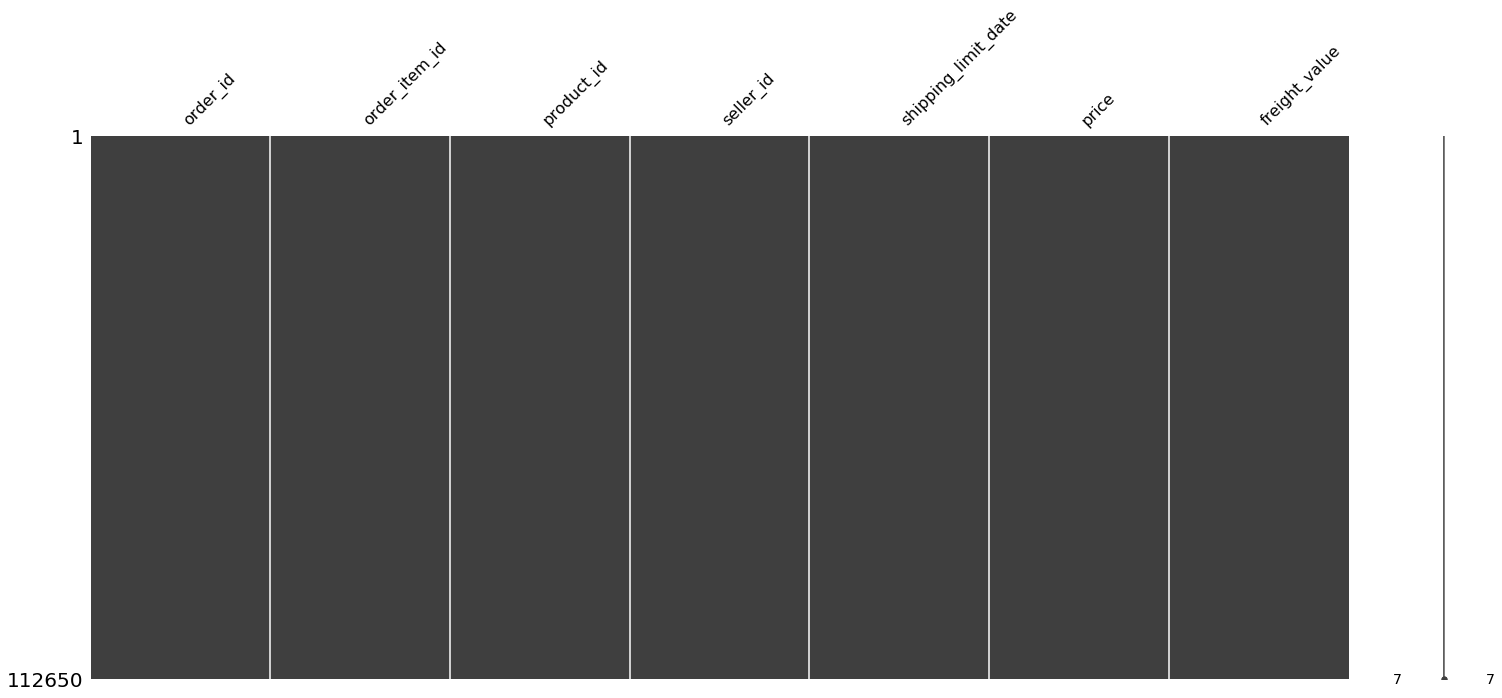

In [9]:
msno.matrix(df_order_items) 

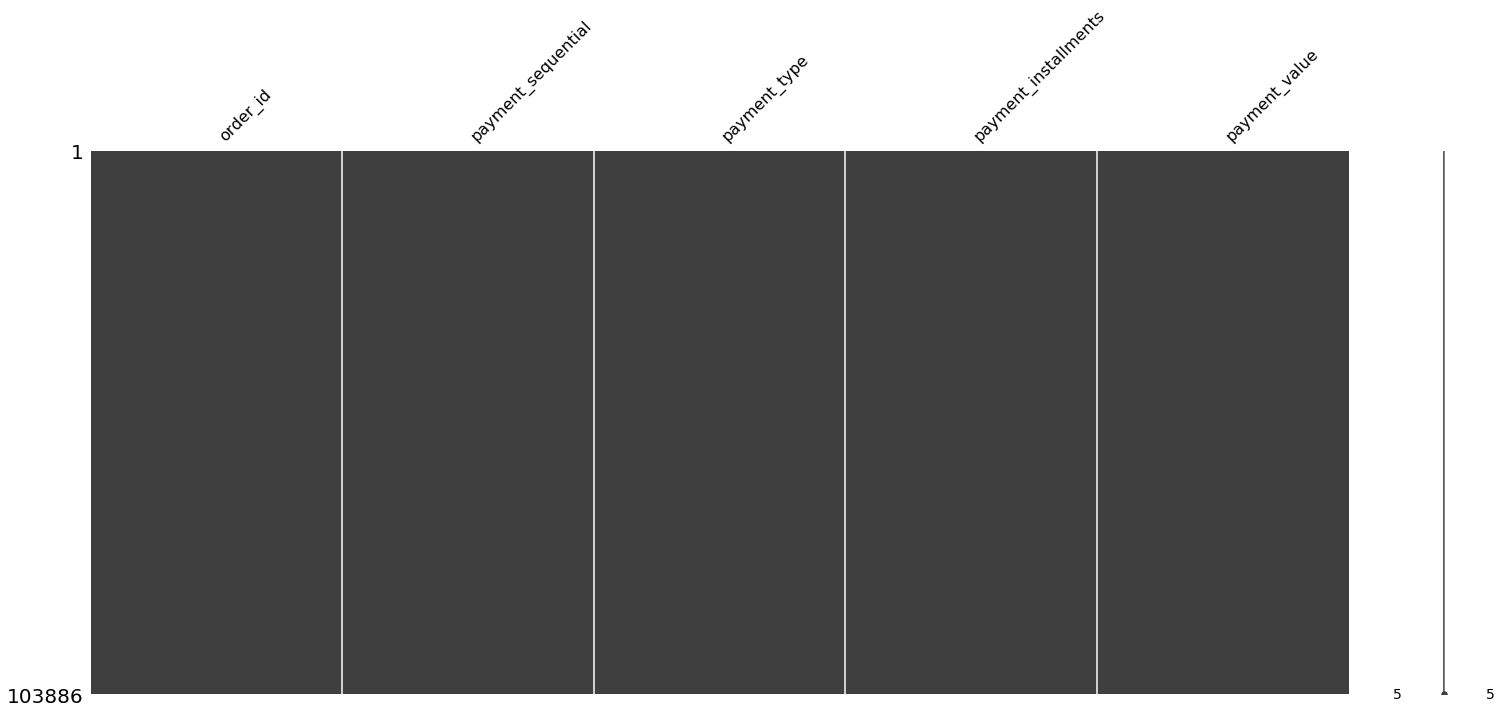

In [10]:
msno.matrix(df_order_payments)

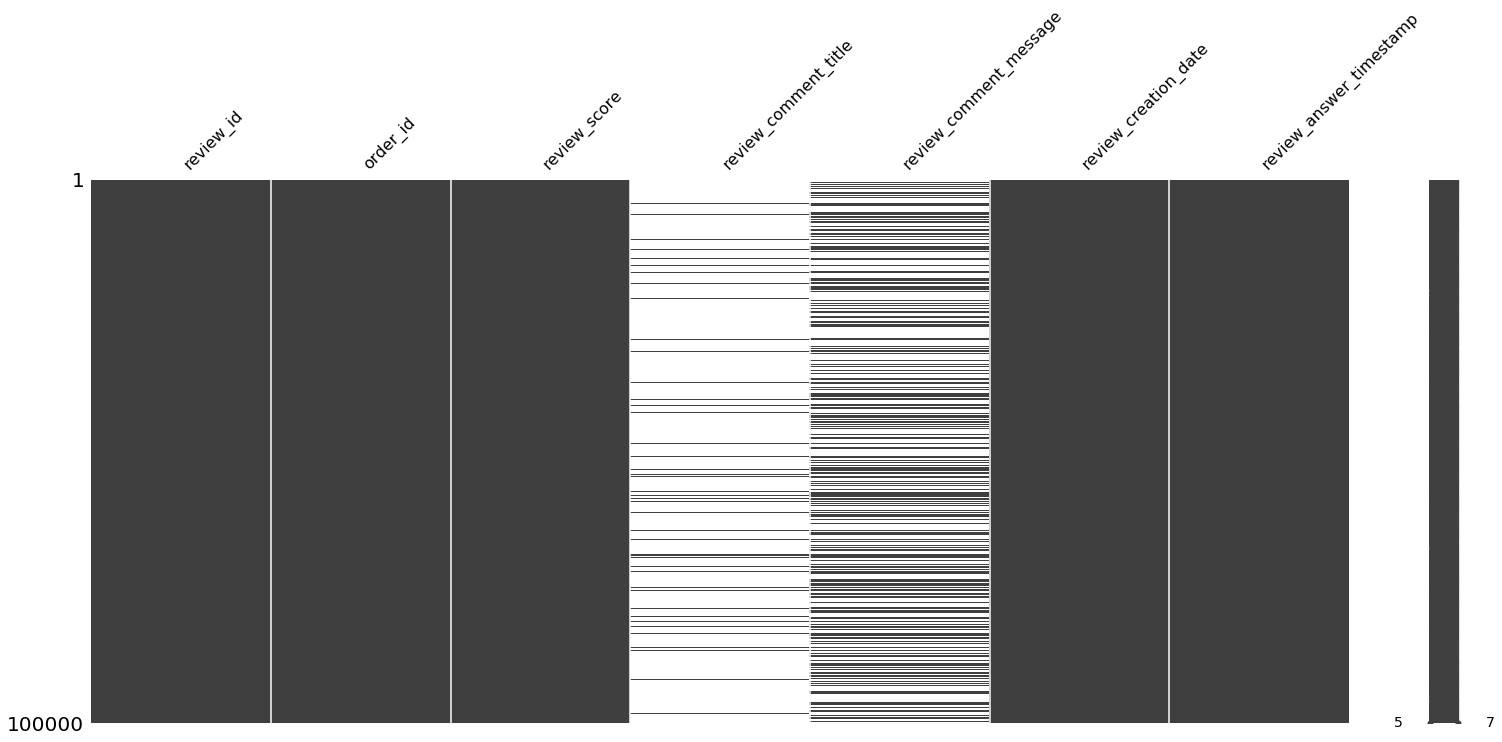

In [11]:
msno.matrix(df_order_reviews)

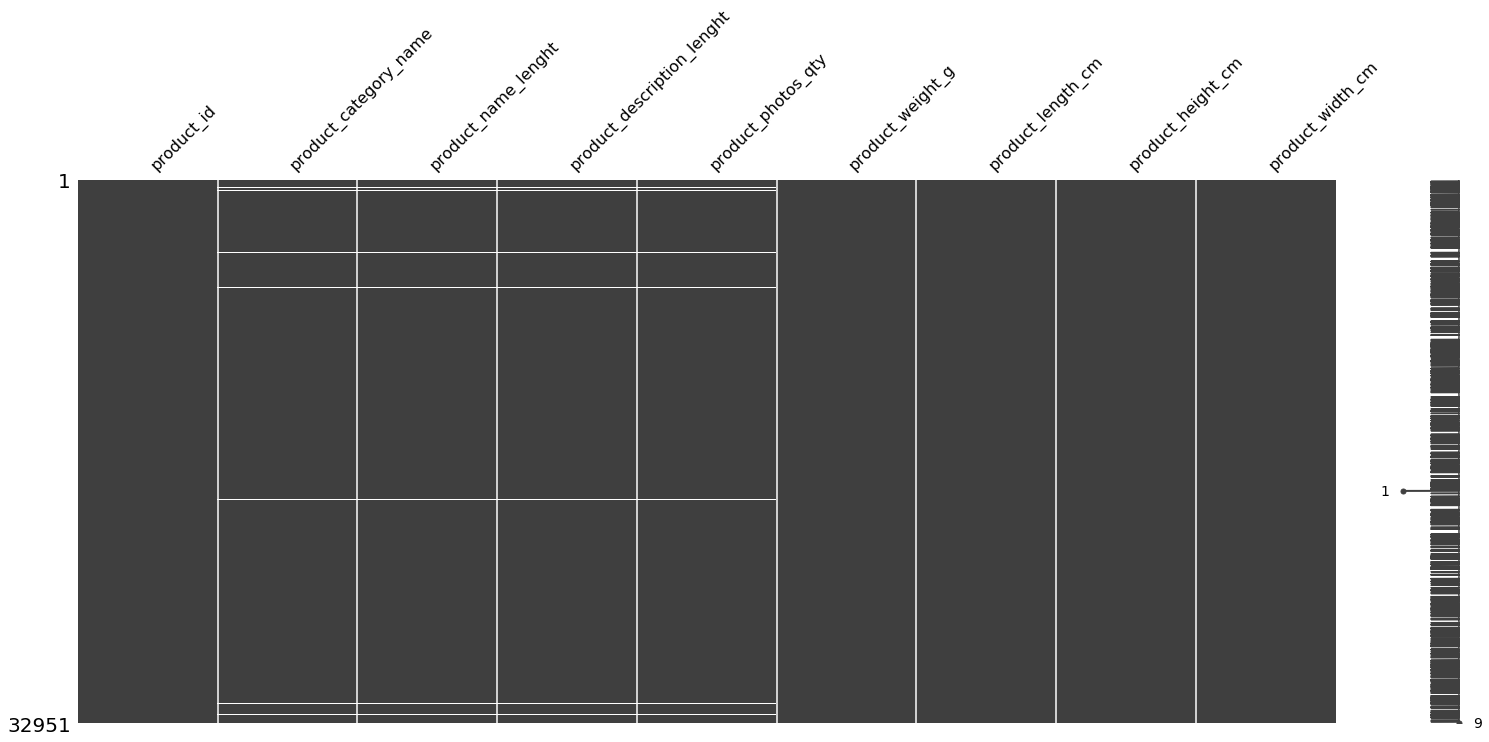

In [12]:
msno.matrix(df_products)

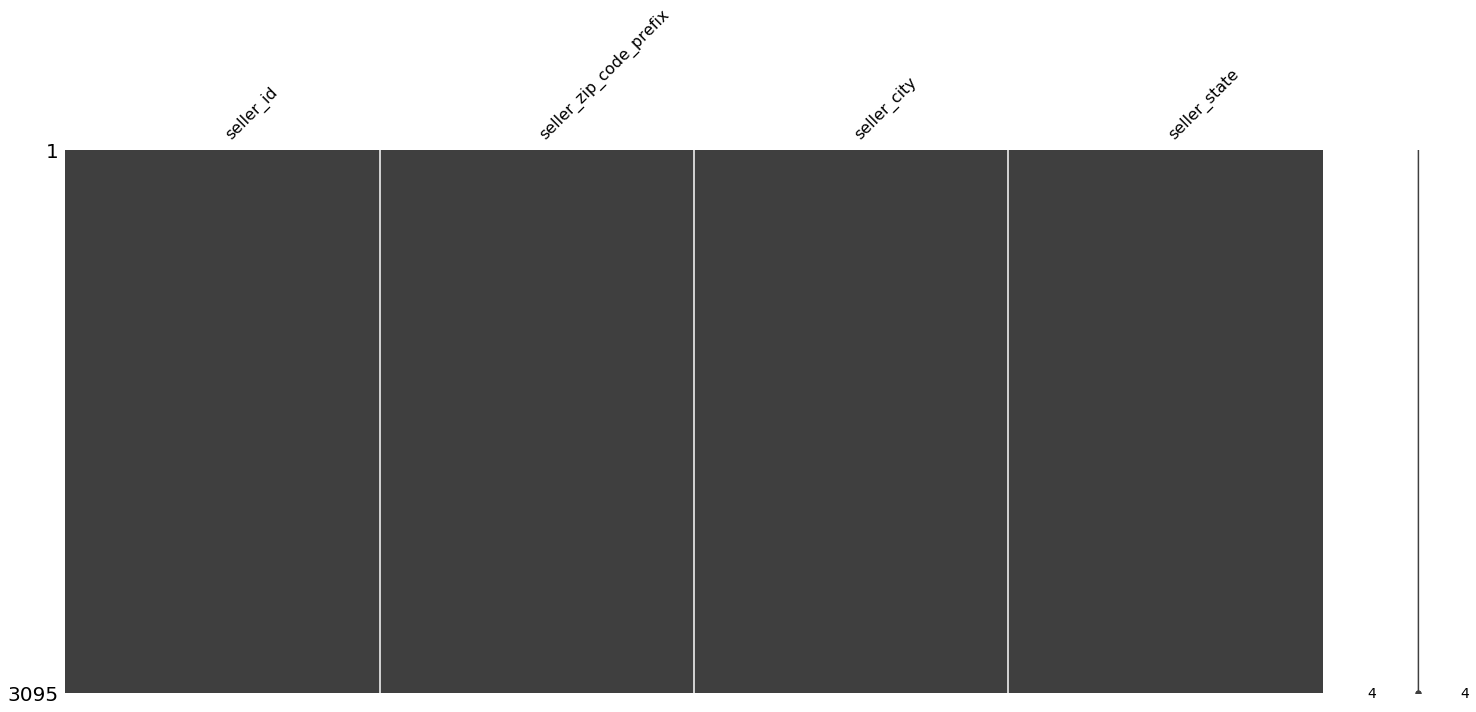

In [13]:
msno.matrix(df_sellers)

Antes de fusionar los data_frame de las bases de datos, eliminamos los filas con los valores NaN de **df_orders** y **df_product**. En **df_order_reviews** eliminamos la *review_comment_title* ya que solo los interesas la reseñas de los clientes, no tenemos encuenta los NaN en *review_comment_message* dabo que es poco problabe que un cliente de una reseña.

In [14]:
df_product_translation.head(10)

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
5           esporte_lazer                sports_leisure
6              perfumaria                     perfumery
7   utilidades_domesticas                    housewares
8               telefonia                     telephony
9      relogios_presentes                 watches_gifts

In [15]:
list_product = df_products['product_category_name'].size*[None]

for ii,jj in zip(df_product_translation['product_category_name'],df_product_translation['product_category_name_english']):
    for pp in df_products.index[df_products['product_category_name'] == ii].tolist():
        list_product[pp] = jj

df_products.insert(2,'product_category_name_english',list_product)        

In [16]:
df_products.head(5)

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

  product_category_name_english  product_name_lenght  \
0                     perfumery                 40.0   
1                           art                 44.0   
2                sports_leisure                 46.0   
3                          baby                 27.0   
4                    housewares                 37.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  
0               16.0               10.0              14.0  
1               30.0               18.0              20.0  
2               18.0                9.0              15.0  
3               26.0                4.0              26.0  
4               20.0               17.0              13.0

In [17]:
df_orders   = df_orders.dropna(how = 'any')
df_products = df_products.dropna(how = 'any')

df_order_reviews.drop(columns=['review_comment_title'], inplace=True)

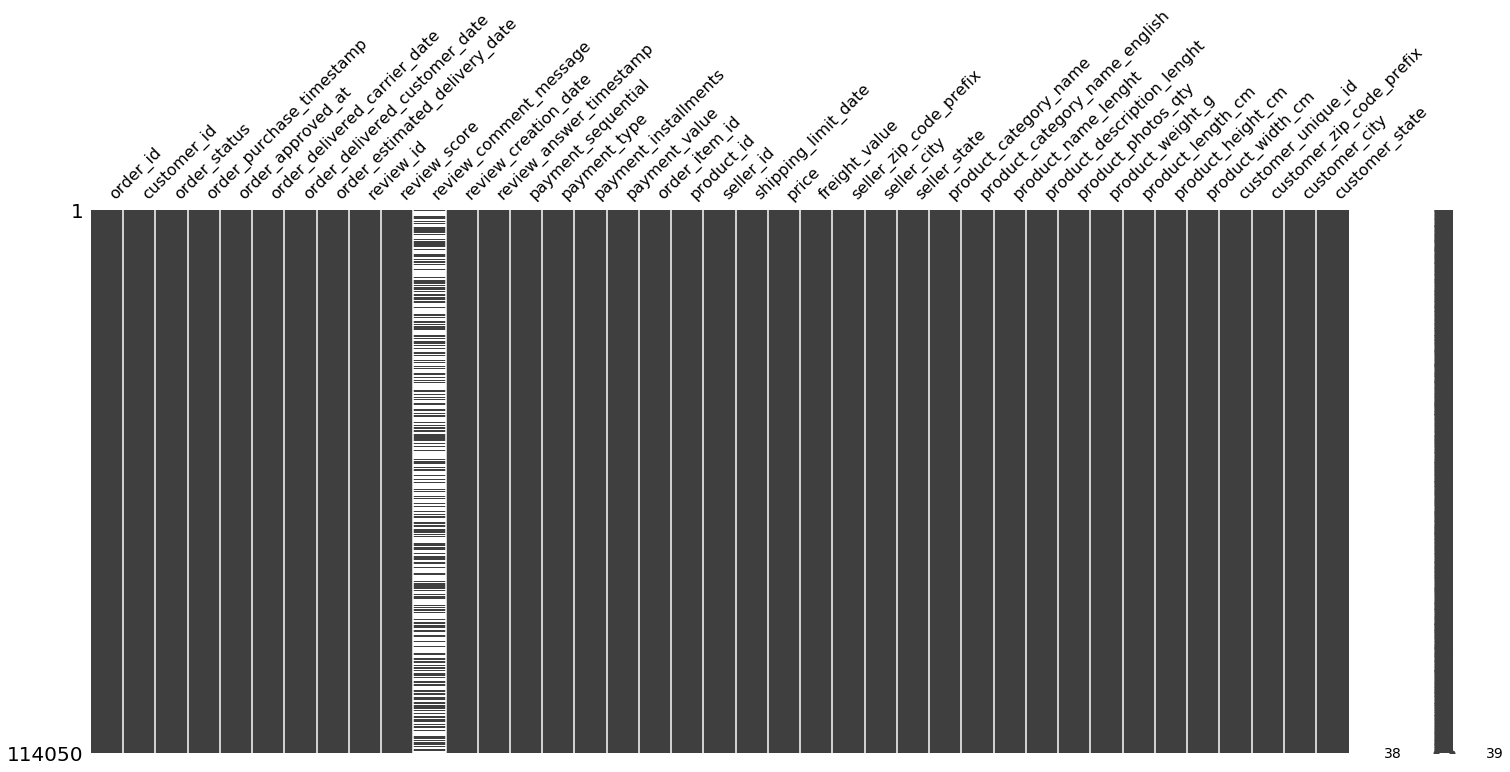

In [18]:
data_e_commerce   = df_orders.merge(df_order_reviews, how  = 'left', on = 'order_id')
data_e_commerce   = data_e_commerce.merge(df_order_payments, how = 'left',on = 'order_id')
data_e_commerce_1 = df_order_items.merge(df_sellers, how = 'left', on = 'seller_id')
data_e_commerce_1 = data_e_commerce_1.merge(df_products, how = 'left', on = 'product_id')

data_e_commerce   = data_e_commerce.merge(data_e_commerce_1, how = 'left', on = 'order_id')
data_e_commerce   = data_e_commerce.merge(df_customers, how = 'left', on = 'customer_id')

aux_list        = list(data_e_commerce.columns)
aux_list.remove('review_comment_message')
data_e_commerce = data_e_commerce.dropna(subset = aux_list, how = "any")
msno.matrix(data_e_commerce) 

Almacenamos la base de datos

In [19]:
data_e_commerce.to_csv(os.path.join(folder_dataset,'data_e_commerce.csv'),index = False, header=True)

###  Marketing Funnel
Con el fin de de observar el viajes de un cliente, desde que ingresa por vez en el Marketing Funnel, necesitamos unir varios datos

Funnel de marketing es el proceso que sigue un equipo de marketing de Olist Store desde que lanza una acción de marketing hasta que consigue una oportunidad de negocio.

In [20]:
# leads dataset
df_olist_marketing  = pd.read_csv(os.path.join(folder_marketing ,list_folder_marketing[1]))
# close leads dataset nuevos clientes a traves de la extratejia de matketing
df_closed_delas     = pd.read_csv(os.path.join(folder_marketing ,list_folder_marketing[0]))

# Marketing Funnel dataset NaNs son clientes potenciales que no cerraron un trato
df_marketing_funnel = df_olist_marketing.merge(df_closed_delas ,on='mql_id', how='left' )

# sellers dataset 
df_sellers          = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[9]))
# Marketing Funnel se fusionó con los vendedores de esta manera obtiene la ubicación del vendedor
df_funnel_seller    = df_marketing_funnel.merge(df_sellers ,on='seller_id', how='left')

# order items dataset
df_order_items      = pd.read_csv(os.path.join(folder_commerce ,list_folder_commerce[5]))
# Marketing Funnel se fusionó con artículos de esta manera se obtiene los productos vendidos por los vendedores
df_funnel_items     = df_marketing_funnel.merge(df_order_items ,on='seller_id', how='left')


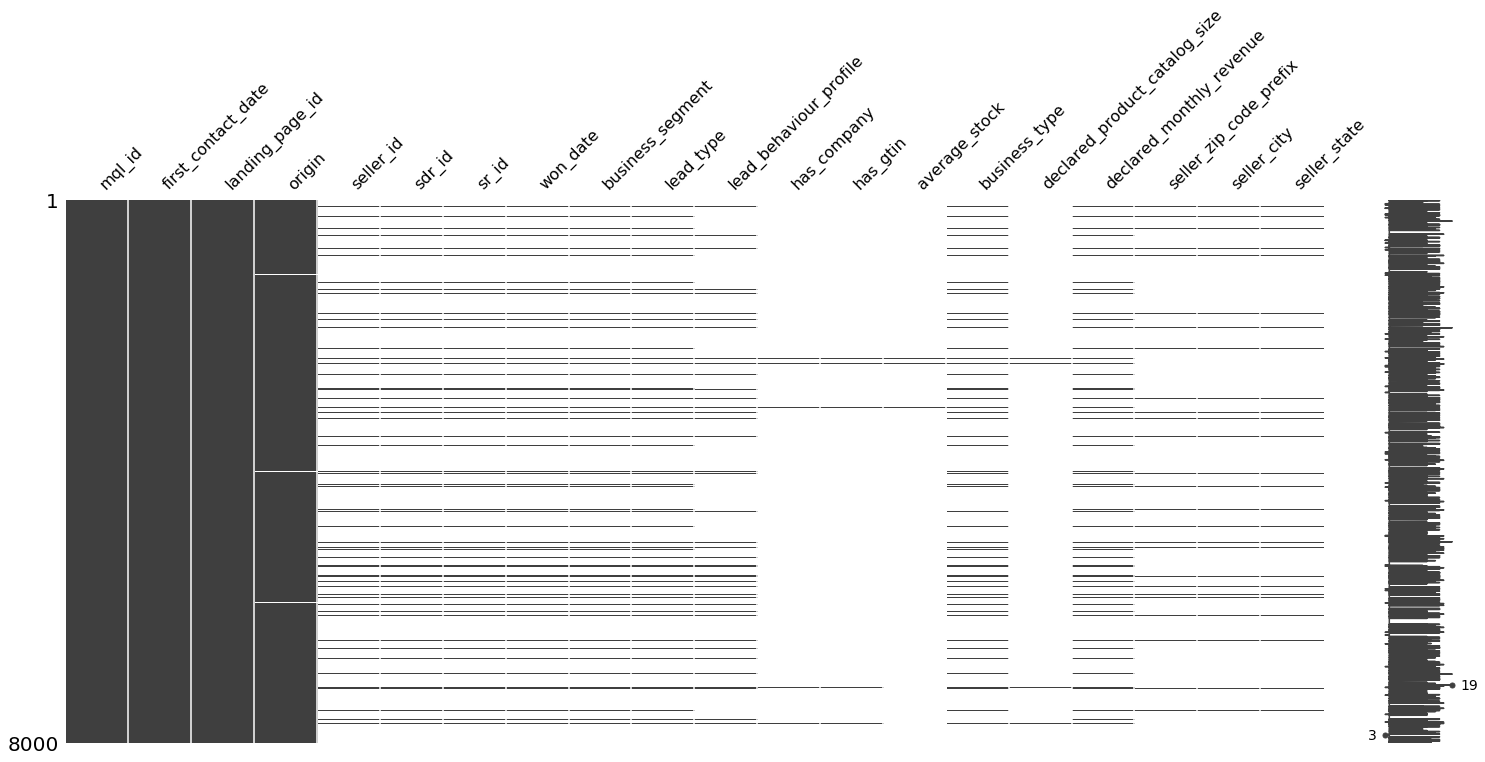

In [21]:
msno.matrix(df_funnel_seller) 


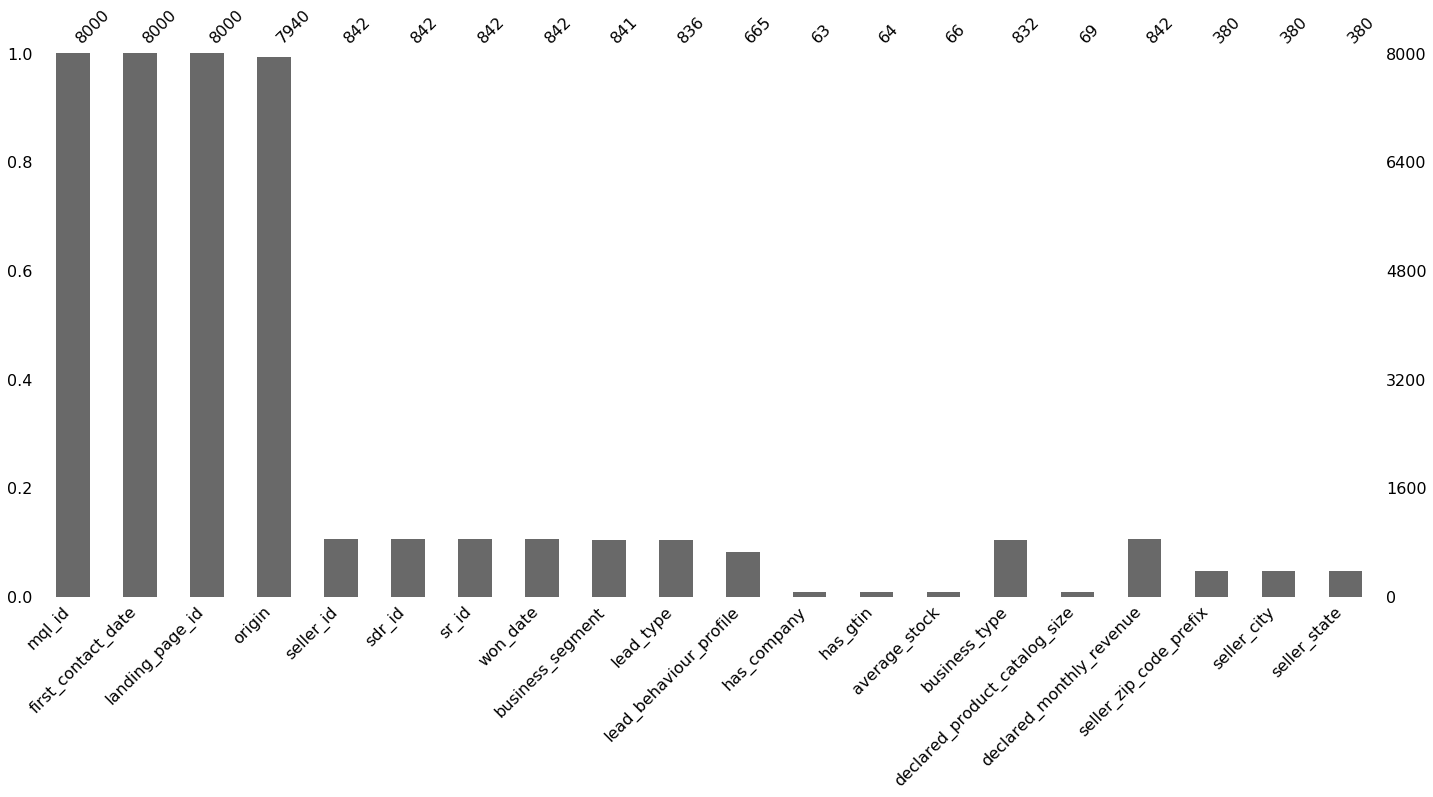

In [22]:
msno.bar(df_funnel_seller) 

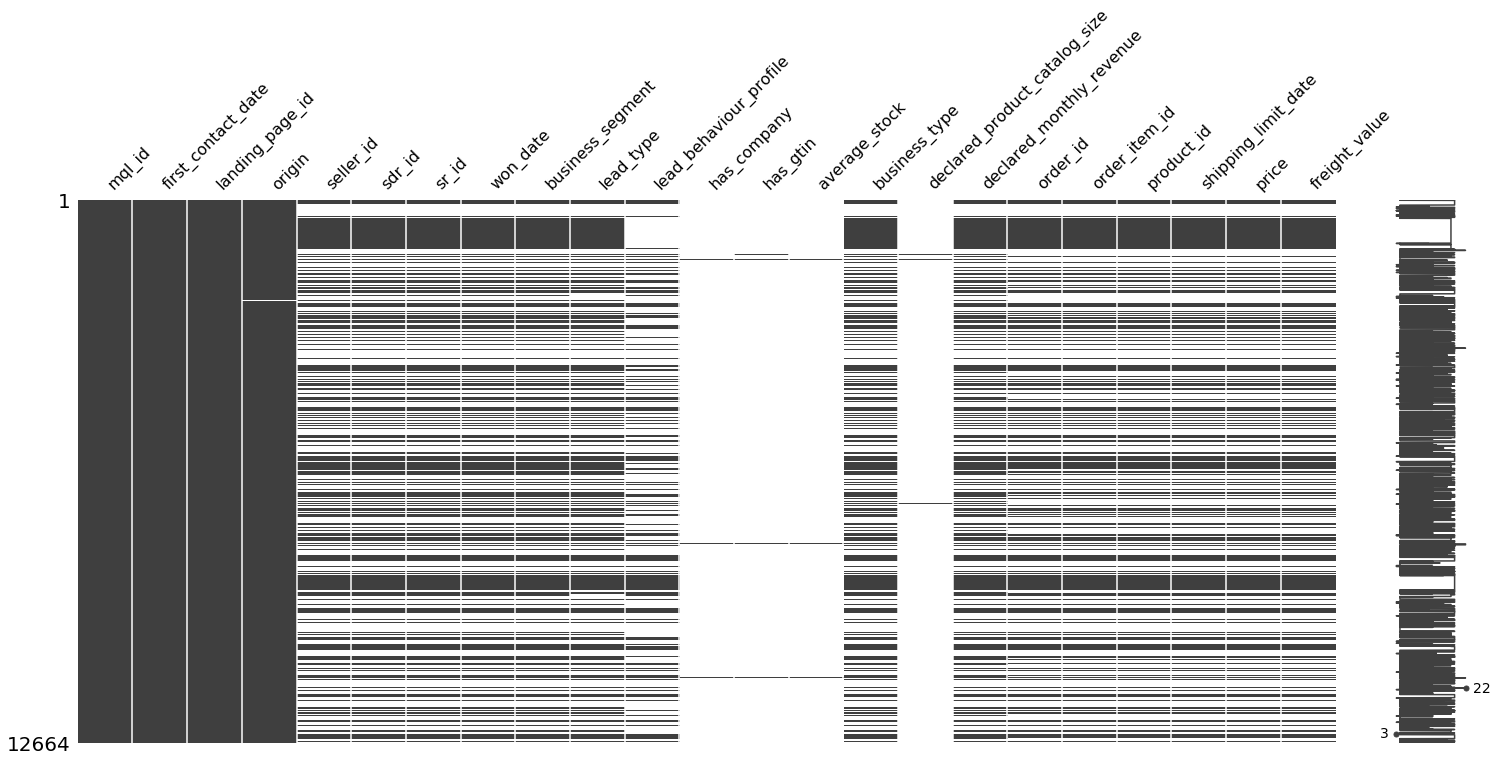

In [23]:
msno.matrix(df_funnel_items)

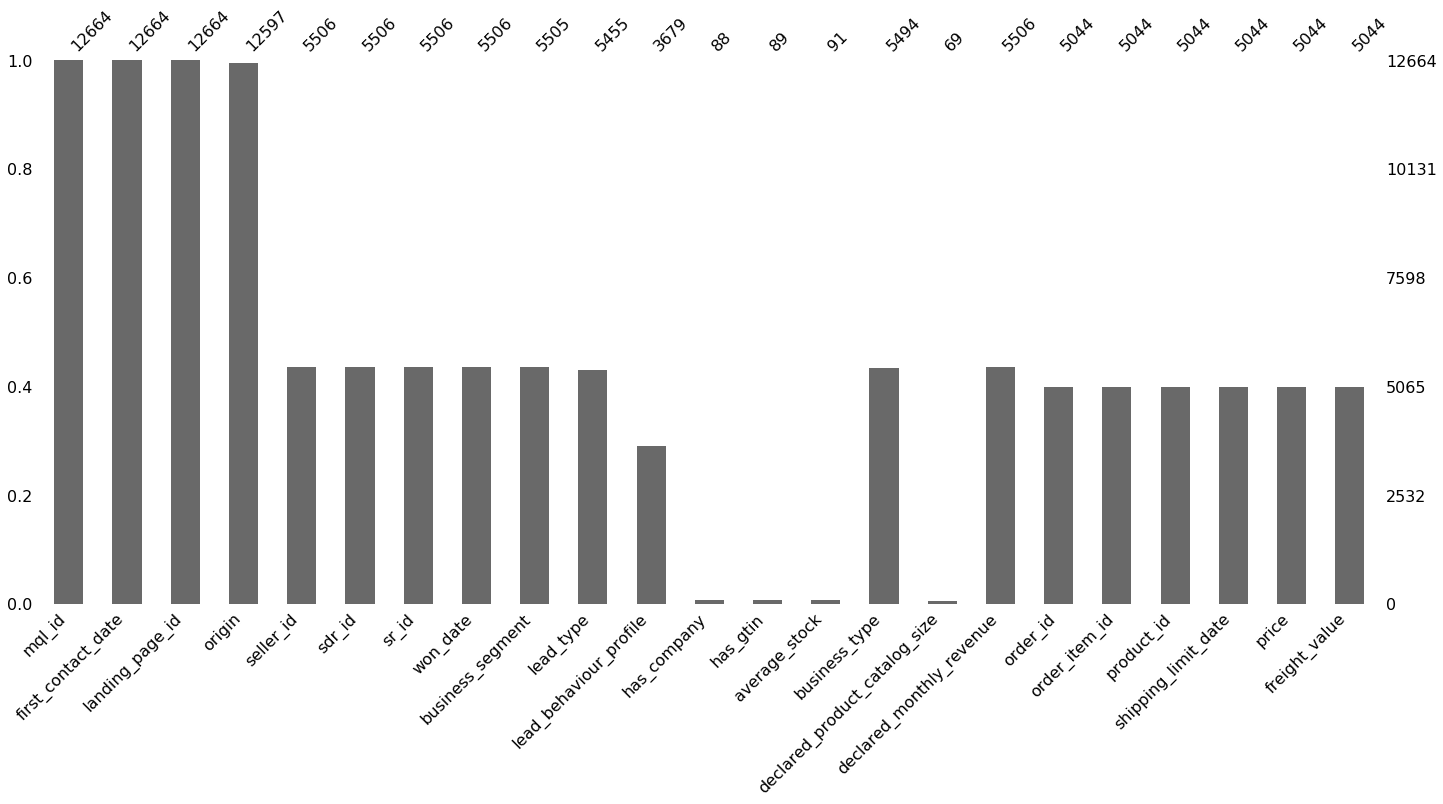

In [24]:
msno.bar(df_funnel_items)

Eliminamos las columnas con menores de 100 elementos, y almacenamos los datos 

In [25]:
df_funnel_seller.drop(columns=['has_company', 'has_gtin',
                               'average_stock','declared_product_catalog_size'], inplace=True)

df_funnel_seller.to_csv(os.path.join(folder_dataset,'df_funnel_seller.csv'),
                        index = False, header=True)

In [26]:
df_funnel_items.drop(columns=['has_company', 'has_gtin',
                               'average_stock','declared_product_catalog_size'], inplace=True)

df_funnel_items.to_csv(os.path.join(folder_dataset,'df_funnel_items.csv'),
                        index = False, header=True)